# Comparison of two simple climate models: FaIR and MAGICC

## Contents

- <a href='#section1'>Carbon cycle</a>

- <a href='#section2'>From greenhouse gas emissions to concentrations</a>

- <a href='#section3'>Forcings</a>

- <a href='#section4'>Climate response</a>

- <a href='#section5'>Probalistic studies</a>

- <a href='#section6'>References</a>

In this notebook core concepts and numerical results of two simple climate models, FaIR and MAGICC, are compared to each other.

The **Finite Amplitude Impulse Response model** (FaIR) is a globally averaged climate model. It simulates concentrations, effective radiative forcing, and temperature changes from given emission time series [1].

In the **Model for the Assessment of Greenhouse Gas Induced Climate Change** (MAGICC) an hemisperically averaged upwelling-diffusion ocean is coupled to an atmospheric model and an globally averaged carbon cycle. The atmosphere is splitted in land- and oceancovering atmosphere for each hemisphere. MAGICC is based on an globally averaged energy balance equation [2].

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import pymagicc
from pymagicc import scenarios

import fair
from fair.RCPs import rcp26, rcp45, rcp6, rcp85

plt.rcParams['figure.figsize'] = [16,9]

In [3]:
# Run FaIR model for RCP scenarios
C26, F26, T26 = fair.forward.fair_scm(emissions=rcp26.Emissions.emissions)
C45, F45, T45 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions)
C60, F60, T60 = fair.forward.fair_scm(emissions=rcp6.Emissions.emissions)
C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)

In [4]:
# Run MAGICC for RCP scenarios
results = {}
params = {}
temp = {}
for name, scen in scenarios.items():
    results[name], params[name] = pymagicc.run(scen, return_config=True)
    temp[name] = (results[name]["SURFACE_TEMP"].GLOBAL.loc[1850:] -
            results[name]["SURFACE_TEMP"].GLOBAL.loc[1850:1900].mean())

<a id='section1'></a>
## Carbon cycle

The change in atmospheric carbon dioxide (CO$_2$) concentration is composed of CO$_2$ emissions minus the amount that is taken up by carbon sinks.

In **FaIR** carbon stocks are modelled by boxes for the deep ocean, ocean mixed layer, biosphere, and geosphere. 
For all boxes a mass balance is drawn which includes the distribution of CO$_2$ emissions on reservoirs and a decay term depending on the amount of accumulated CO2 and its lifetime. Carbon uptake depends on the temperature and the amount of already accumulated carbon. These feedbacks are included as a scale for the lifetime of carbon dioxide. 
For simplicity the same scale for all carbon stocks is used which is approximated by equating two expressions for an 100-year integrated impulse response function [1].

In **MAGICC** the terrestrial carbon stock is modelled by boxes for living plants, detritus, and organic matter in soils. Only the net primary production is modelled by mass balances which includes fluxes between these boxes. The decay is modelled with an time-dependent timescale that simulates not regrowing deforestation. Feedbacks due to CO$_2$ fertilization and a changing temperature are included. 
Terrestrial carbon fluxes, respiration and decomposition are temperature-dependent. This feedback is modelled by scaling the fluxes with an exponential function of the temperature change and some scale describing the sensitivity of fluxes to global warming.
The simulation of the carbon flux between atmosphere and ocean is based on the temperature-dependent partial pressure differentials of CO$_2$ [2]. 

In the following figure, CO$_2$ emissions of four RCP scenarios and resulting concentrations by simulation with FaIR and MAGICC are plotted.

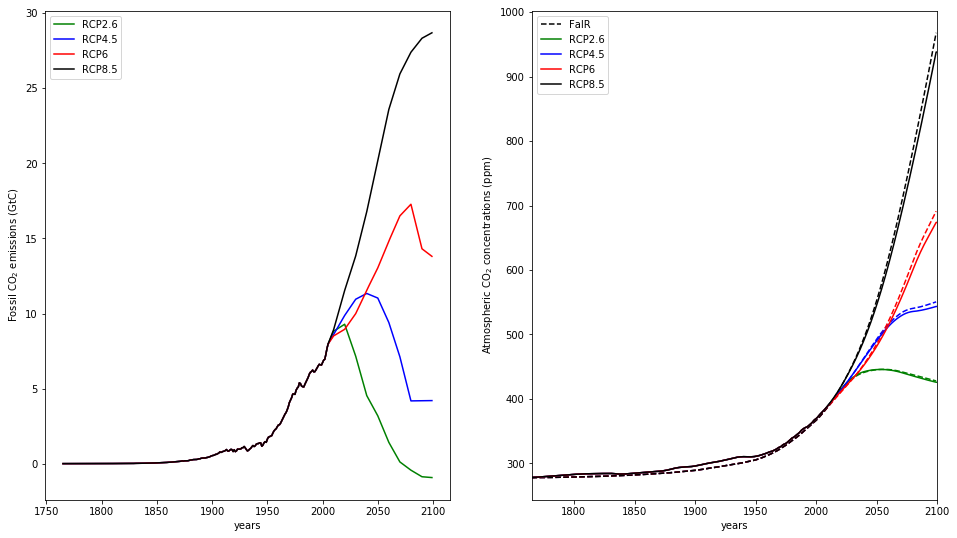

In [5]:
# Plot fossil CO2 emissions and atmospheric CO2 concentrations
# dashed lines display projections of FaIR, solid lines display projections of MAGICC

# Fossil CO2 emissions
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(rcp26.Emissions.year[:335], rcp26.Emissions.co2_fossil[:335], color='green', label='RCP2.6')
ax1.plot(rcp45.Emissions.year[:335], rcp45.Emissions.co2_fossil[:335], color='blue', label='RCP4.5')
ax1.plot(rcp6.Emissions.year[:335], rcp6.Emissions.co2_fossil[:335], color='red', label='RCP6')
ax1.plot(rcp85.Emissions.year[:335], rcp85.Emissions.co2_fossil[:335], color='black', label='RCP8.5')
ax1.legend()
ax1.set_xlabel('years')
ax1.set_ylabel('Fossil CO$_2$ emissions (GtC)')
# FaIR
ax2.plot(rcp26.Emissions.year[:335], C26[:335, 0], color='green',linestyle='--')
ax2.plot(rcp45.Emissions.year[:335], C45[:335, 0], color='blue',linestyle='--')
ax2.plot(rcp6.Emissions.year[:335], C60[:335, 0], color='red',linestyle='--')
ax2.plot(rcp85.Emissions.year[:335], C85[:335, 0], color='black',linestyle='--', label='FaIR')
# MAGICC
concCO2=results["RCP26"]["CO2_CONC"].GLOBAL
concCO2.plot(label="RCP2.6", color='green')
concCO2=results["RCP45"]["CO2_CONC"].GLOBAL
concCO2.plot(label="RCP4.5", color='blue')
concCO2=results["RCP60"]["CO2_CONC"].GLOBAL
concCO2.plot(label="RCP6", color='red')
concCO2=results["RCP85"]["CO2_CONC"].GLOBAL
concCO2.plot(label="RCP8.5", color='black')
ax2.legend()
ax2.set_xlabel('years')
ax2.set_ylabel('Atmospheric CO$_2$ concentrations (ppm)')
plt.show()

<a id='section2'></a>
## From greenhouse gas emissions to concentrations

Atmospheric concentrations of **non-CO$_2$ well-mixed greenhouse gases** (wmGHG) rise due to natural and anthropogenic emissions and decline due to uptake by natural sinks.

In **FaIR** natural emissions are only included for methane (CH$_4$) and nitrous oxide (N$_2$O). For all wmGHG the lifetimes are assumed to be constant [1].

In **MAGICC** natural emissions of CH$_4$ and N$_2$O are estimated by budget equations based on concentrations and fossil and landuse related emissions. Lifetimes of wmGHG are modelled time-varying including the following feedbacks.
Tropospheric lifetime of methane shortens if the amount of OH increases which depends on emissions from nitrogen oxides, carbon monoxide, and volatile organic compounds and the change in methane concentration. It depends also on temperature which influences chemical reaction rates.
MAGICC furthermore includes a delay of three years in N$_2$O concentrations related to the transport to the stratospheric sink. Moreover, the atmospheric burden of N$_2$O feeds back to its own lifetime. The stratospheric lifetimes of halogenated gases are assumed to decrease by 15% per 1K global mean surface temperature warming [2].

In the following figure CH$_4$ and N$_2$O concentrations are plotted for simulations with MAGICC and FaIR.

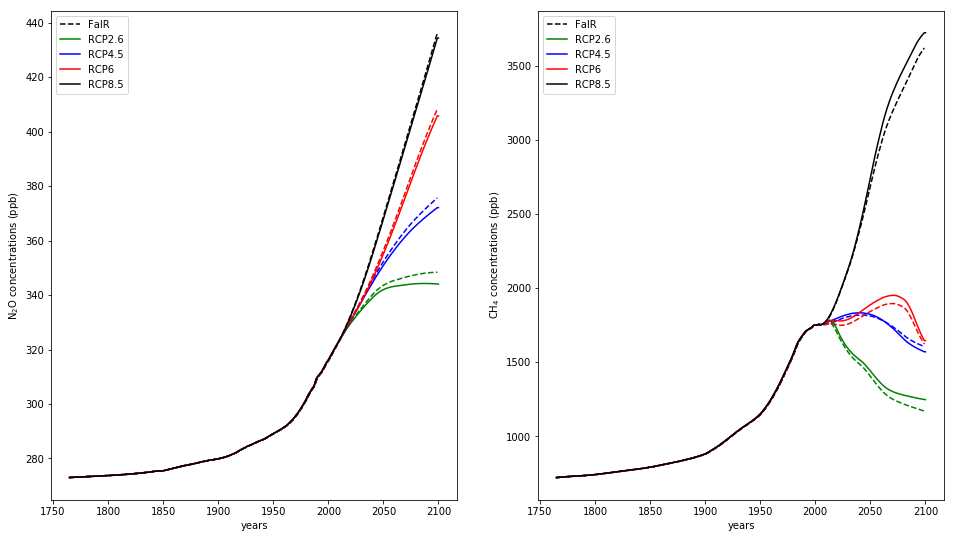

In [6]:
f, (ax1, ax2) = plt.subplots(1,2)
#
# N2O concentrations
# FaIR
ax1.plot(rcp26.Emissions.year[:335], C26[:335, 2], color='green',linestyle='--')
ax1.plot(rcp45.Emissions.year[:335], C45[:335, 2], color='blue',linestyle='--')
ax1.plot(rcp6.Emissions.year[:335], C60[:335, 2], color='red',linestyle='--')
ax1.plot(rcp85.Emissions.year[:335], C85[:335, 2], color='black',linestyle='--', label='FaIR')
# MAGICC
concN2O=results["RCP26"]["N2O_CONC"].GLOBAL
ax1.plot(concN2O, label="RCP2.6", color='green')
concN2O=results["RCP45"]["N2O_CONC"].GLOBAL
ax1.plot(concN2O, label="RCP4.5", color='blue')
concN2O=results["RCP60"]["N2O_CONC"].GLOBAL
ax1.plot(concN2O, label="RCP6", color='red')
concN2O=results["RCP85"]["N2O_CONC"].GLOBAL
ax1.plot(concN2O, label="RCP8.5", color='black')
ax1.legend()
ax1.set_ylabel('N$_2$O concentrations (ppb)')
ax1.set_xlabel('years')
#
# CH4 concentrations
# FaIR
ax2.plot(rcp26.Emissions.year[:335], C26[:335, 1], color='green',linestyle='--')
ax2.plot(rcp45.Emissions.year[:335], C45[:335, 1], color='blue',linestyle='--')
ax2.plot(rcp6.Emissions.year[:335], C60[:335, 1], color='red',linestyle='--')
ax2.plot(rcp85.Emissions.year[:335], C85[:335, 1], color='black',linestyle='--', label='FaIR')
# MAGICC
concCH4=results["RCP26"]["CH4_CONC"].GLOBAL
ax2.plot(concCH4, label="RCP2.6", color='green')
concCH4=results["RCP45"]["CH4_CONC"].GLOBAL
ax2.plot(concCH4, label="RCP4.5", color='blue')
concCH4=results["RCP60"]["CH4_CONC"].GLOBAL
ax2.plot(concCH4, label="RCP6", color='red')
concCH4=results["RCP85"]["CH4_CONC"].GLOBAL
ax2.plot(concCH4, label="RCP8.5", color='black')
ax2.legend()
ax2.set_ylabel('CH$_4$ concentrations (ppb)')
ax2.set_xlabel('years')
plt.show()

<a id='section3'></a>
## Forcings

FaIR uses effective radiative forcing where all efficacies are set to 1 except that for black carbon which is set to 3. In MAGICC efficacies can optionally be applied, which are then scaled by internal efficacies which represent effects due to the model structure.

For the computation of forcings of the **greenhouse gases** (GHGs) CO$_2$, N$_2$O, and CH$_4$ both models include band overlaps of CO$_2$ and N$_2$O and of CH$_4$ and N$_2$O. Higher background concentrations lead to a decrease of forcing relative to the increase in CO$_2$ concentrations.
In FaIR it is assumed that a doubling of CO$_2$ concentrations compared to preindustrial levels leads to a (default) forcing F$_{2x}$ of 3.71 Wm$^{-2}$. For the forcings of GHGs in FaIR the model of Etminan et al. is used [3]. The model is scaled to F$_{2x}$ to ensure that the results fit to a possibly user-supplied F$_{2x}$.
MAGICC uses standard simplified expressions for methane and nitrous oxide forcing.
Forcings of further GHGs are assumed to be linearly dependent from the change in atmospheric concentration with respect to preindustrial levels.
In MAGICC the land-ocean forcing contrast is approximated from an estimate for CFC-11 from Hansen et al. 
The hemisperic forcing contrast for GHGs with a short lifetime is assumed to equate the emission ratio where for longlived GHGs the values for CFC-11 are scaled.

**Tropospheric ozone** is formed by chemical reactions of CH$_4$, NOx, CO, and non-methane volatile organic compounds (NMVOC). Both models assume that the forcing by NOx, CO, and NMVOC depends linearly from their emissions. The forcing by methane is modelled from its atmospheric concentrations. This relation is in FaIR assumed to be linear and in MAGICC assumed to be logarithmic. In FaIR a temperature feedback can be included optionally.

The forcing of **stratospheric ozone** is modelled in FaIR and MAGICC with the same functional dependance from equivalent effective stratospheric chlorine (EESC). EESC depends on concentrations of ozone-depleting substances, number of chorine and bromine atoms, fractional release values and the efficiency of bromine vs. chlorine. Both climate models include 16 ozone-depleting substances.

The forcing of **stratospheric water vapour** from methane oxidation is in FaIR assumed to be 12% of the effective radiative forcing of methane, whereas in MAGICC it is assumed to be 15% of the radiative forcing of methane excluding the band overlap of methane and nitrous oxide.

Furthermore, FaIR includes forcing of **contrails**. The user can chose between a scaling with aviation-based NOx emissions, a scaling with global supply of jet kerosene fuel or an external forcing time series.

Both models include approximations for the direct and indirect forcings of **aerosols**. **Direct** forcings of aerosols are computed linearly dependent from their emissions justified by short lifetimes of aerosols. Both models include black carbon, organic carbon, sulfur compounds (SOx), and nitrate aerosols. In addition to that, FaIR includes also secondary organic aerosols and anthropogenic NMVOC. The land-ocean ratio in MAGICC is taken from Hansen et al. [4].
**Indirect** effects of aerosols in FaIR are calculated from emissions of SOx and the sum of black carbon and organic carbon to approximate forcing due to aerosol-cloud interaction. MAGICC models indirect aerosol forcings based on time-series of optical thicknesses of sulafte, nitrate, black carbon and organic carbon including reference patterns for the effects on albedo and cloud cover.

**Landuse** change changes surface albedo and evapotranspiration pattern which causes radiative forcing. In FaIR forcing from landuse change is scaled with cumulative CO$_2$ emissions from landuse change. Although regional effects cannot be included in FaIR the results are similar to those of RCP scenarios.
There is also the option to supply an own landuse effective radiative forcing time series.

Forcings from **solar** variability and **volcanoes** are included as external time series. As default forcings from volcanoes are set to zero from 2015 onwards. In both models the SOLARIS-HEPPA v3.2 solar irradiance dataset prepared for CMIP6 is used for the solar forcing time series.

In the following figure forcing of greenhouse gases and total forcing simulated by FaIR and MAGICC are plotted.

References: [1] for FaIR and [2] for MAGICC.

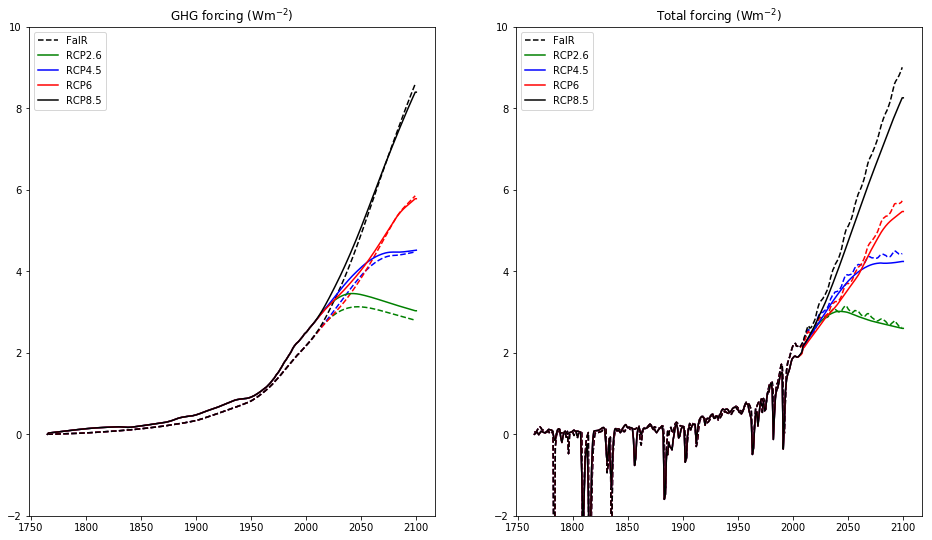

In [7]:
f, (ax1, ax2) = plt.subplots(1,2)

# FaIR - Forcings
# CO2 + CH4 + N2O + minor GHGs
RF_GHG_RCP26 = np.sum( F26[:,:3], axis=1 ) 
RF_GHG_RCP45 = np.sum( F45[:,:3], axis=1 ) 
RF_GHG_RCP60 = np.sum( F60[:,:3], axis=1 ) 
RF_GHG_RCP85 = np.sum( F85[:,:3], axis=1 ) 
# total
RF_total_RCP26 = np.sum( F26, axis=1 ) 
RF_total_RCP45 = np.sum( F45, axis=1 ) 
RF_total_RCP60 = np.sum( F60, axis=1 ) 
RF_total_RCP85 = np.sum( F85, axis=1 ) 

ax1.plot(rcp26.Emissions.year[:335], RF_GHG_RCP26[:335], color='green', linestyle='--')
ax1.plot(rcp45.Emissions.year[:335], RF_GHG_RCP45[:335], color='blue', linestyle='--')
ax1.plot(rcp6.Emissions.year[:335], RF_GHG_RCP60[:335], color='red', linestyle='--')
ax1.plot(rcp85.Emissions.year[:335], RF_GHG_RCP85[:335], color='black', linestyle='--', label='FaIR')
ax1.set_title("GHG forcing (Wm$^{-2}$)")

RF_GHG=results["RCP26"]["GHG_RF"].GLOBAL
ax1.plot(RF_GHG, label="RCP2.6", color='green')
RF_GHG=results["RCP45"]["GHG_RF"].GLOBAL
ax1.plot(RF_GHG, label="RCP4.5", color='blue')
RF_GHG=results["RCP60"]["GHG_RF"].GLOBAL
ax1.plot(RF_GHG, label="RCP6", color='red')
RF_GHG=results["RCP85"]["GHG_RF"].GLOBAL
ax1.plot(RF_GHG, label="RCP8.5", color='black')
ax1.set_ylim([-2,10])
ax1.legend()

ax2.plot(rcp26.Emissions.year[:335], RF_total_RCP26[:335], color='green', linestyle='--')
ax2.plot(rcp45.Emissions.year[:335], RF_total_RCP45[:335], color='blue', linestyle='--')
ax2.plot(rcp6.Emissions.year[:335], RF_total_RCP60[:335][:335], color='red', linestyle='--')
ax2.plot(rcp85.Emissions.year[:335], RF_total_RCP85[:335], color='black', linestyle='--', label='FaIR')
ax2.set_title("Total forcing (Wm$^{-2}$)")

RFtotal=results["RCP26"]["TOTAL_INCLVOLCANIC_RF"].GLOBAL
ax2.plot(RFtotal, label="RCP2.6", color='green')
RFtotal=results["RCP45"]["TOTAL_INCLVOLCANIC_RF"].GLOBAL
ax2.plot(RFtotal, label="RCP4.5", color='blue')
RFtotal=results["RCP60"]["TOTAL_INCLVOLCANIC_RF"].GLOBAL
ax2.plot(RFtotal, label="RCP6", color='red')
RFtotal=results["RCP85"]["TOTAL_INCLVOLCANIC_RF"].GLOBAL
ax2.plot(RFtotal, label="RCP8.5", color='black')
ax2.set_ylim([-2,10])
ax2.legend()

plt.show()

<a id='section4'></a>
## Climate Response

In **FaIR** the total global temperature change is approximated by a two-time constant model. This model is composed of a part describing the slow temperature change due to the deep ocean and a part describing the fast temperature change due to forcings including the heat uptake by the upper ocean. The model contains parameters that depend on the transient climate response (TCR) and the equilibrium climate sensitivity (ECS) which can be optionally updated in each timestep to include a time dependence of ECS and TCR. ECS and TCR are fitted using Monte-Carlo-simulations with emissions from the RCP time series constrained by historical temperature observations [1].

In **MAGICC** the temperature change is modelled by a time-varying climate sensitivity and an upwelling-diffusion model for the ocean.
The ocean is splitted in a mixed layer and some equidistant deeper layers. The heat flux from the ocean mixed layer to deeper layers depends on thermal diffusion, downwelling with entrainment, and upwelling. The heat uptake is computed by a global energy balance including a time-varying, forcing-dependent effective climate sensitivity. The effective climate sensitivity is based on the transient energy balance equation. It can be determined by comparing simulated forcings and oceanic heat uptake to known values. The so calculated heat uptake is verfied by integrating the heat content changes over the ocean layers [2].

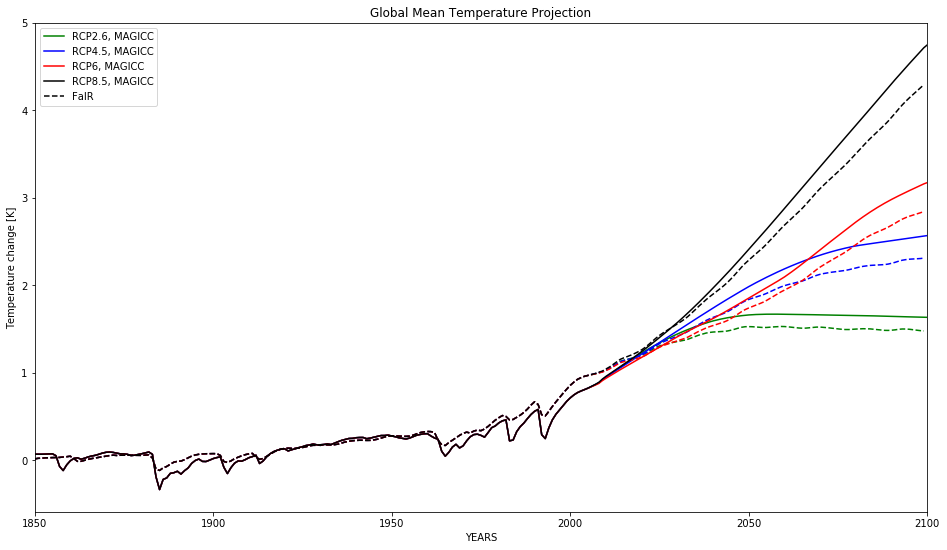

In [8]:
# Plot projected temperature change
# Dashed lines show projections by FaIR and solid lines show projections by MAGICC
temp["RCP26"].plot(label="RCP2.6, MAGICC", color='green')
plt.plot(rcp26.Emissions.year[85:335], T26[85:335], color='green',linestyle='dashed')
temp["RCP45"].plot(label="RCP4.5, MAGICC", color='blue')
plt.plot(rcp45.Emissions.year[85:335], T45[85:335], color='blue',linestyle='dashed')
temp["RCP60"].plot(label="RCP6, MAGICC", color='red')
plt.plot(rcp6.Emissions.year[85:335], T60[85:335], color='red',linestyle='dashed')
temp["RCP85"].plot(label="RCP8.5, MAGICC", color='black')
plt.plot(rcp85.Emissions.year[85:335], T85[85:335], label="FaIR", color='black',linestyle='dashed')
plt.legend()
plt.title("Global Mean Temperature Projection")
plt.ylabel("Temperature change [K]")
#plt.ylabel(u"°C over pre-industrial (1850-1900 mean)") MAGICC
plt.show()

<a id='section5'></a>
## Probalistic studies

Simple climate models are cheap to compute, so they can be used for probalistic studies. Because of short computation times a large number of parameter sets and runs can be chosen.
One purpose is to find greenhouse gas emission limits for not exceeding some temperature target. A wide range of emission scenarios can be modelled which is then constrained for example by oberserved surface temperature, radiative forcing of a reference year or effective climate sensitivity from coupled model intercomparison projects.
Another application is to access parametrizations or the climate sensitivity. In FaIR this approach is used to find an estimate for ECS and TCR including a correlation of ECS and TCR. Probalistic studies are also used to assess uncertainy ranges of climate simulations [1].

An example for a probalistic application of FaIR is done in the following. The approach is based on that of IPCC SR15 [5] for estimating a carbon budget.
First global warming for RCP4.5 is simulated for 100 ECS/TCR-pairs, which are then constrained to historical temperature data. To estimate contributions of non-CO$_2$ climate forcers CO$_2$-only runs are done for these constrained models. Linear regression leads to an approximate functional relation of non-CO2 peak warming to global peak warming. Values for already emitted CO$_2$ are taken from IPCC SR15 [6]. The transient climate response to cumulative carbon emissions (TCRE) is estimated from simulated temperatures. For a reliable carbon budget one should include uncertainties and a higher number of model runs.

In [9]:
# Run model ensemble for varied TCR and ECS pairs, constrain then to historical temperature data
from scipy import stats
from fair.tools.ensemble import tcrecs_generate

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
    
from fair.tools.constrain import hist_temp

# generate 100 TCR and ECS pairs, using a lognormal distribution informed by CMIP5 models
tcrecs = tcrecs_generate('cmip5', n=100, dist='lognorm', correlated=True, seed=38571)

# generate some forcing scale factors with SD of 10% of the best estimate
F_scale = stats.norm.rvs(size=(100,13), loc=1, scale=0.1, random_state=40000)
F2x = 3.71 * F_scale[:,0]
F_scale[:,0] = 1.0  # set CO2 forcing scaling with F2x above

# generate ensemble for carbon cycle parameters
r0 = stats.norm.rvs(size=100, loc=35, scale=3.5, random_state=41000)
rc = stats.norm.rvs(size=100, loc=0.019, scale=0.0019, random_state=42000)
rt = stats.norm.rvs(size=100, loc=4.165, scale=0.4165, random_state=45000)

nt = len(rcp85.Emissions.year)
T = np.zeros((nt,100))

# evaluate model ensemble
for i in range(100):
    _, _, T[:,i] = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions,
                            r0 = r0[i],
                            rc = rc[i],
                            rt = rt[i],
                            tcrecs = tcrecs[i,:],
                            scale = F_scale[i,:],
                            F2x = F2x[i]
                           )

# Constrain models to historical temperature data
# load up Cowtan and Way data remotely
url = 'http://www-users.york.ac.uk/~kdc3/papers/coverage2013/had4_krig_annual_v2_0_0.txt'
response = urlopen(url)
CW = np.loadtxt(response)
constrained = np.zeros(100, dtype=bool)
for i in range(100):
    # we use observed trend from 1880 to 2016
    constrained[i],_,_,_,_ = hist_temp(
        CW[30:,1], T[1880-1765:2019-1765,i], CW[30:,0])

/usr/local/lib/python3.6/dist-packages/fair/forward.py:16: RuntimeWarning: overflow encountered in exp
  iirf_arr = alp_b*(np.sum(a*tau*(1.0 - np.exp(-100.0/(tau*alp_b)))))


38 of 100 models remain after constraining them to historical temperature data. 



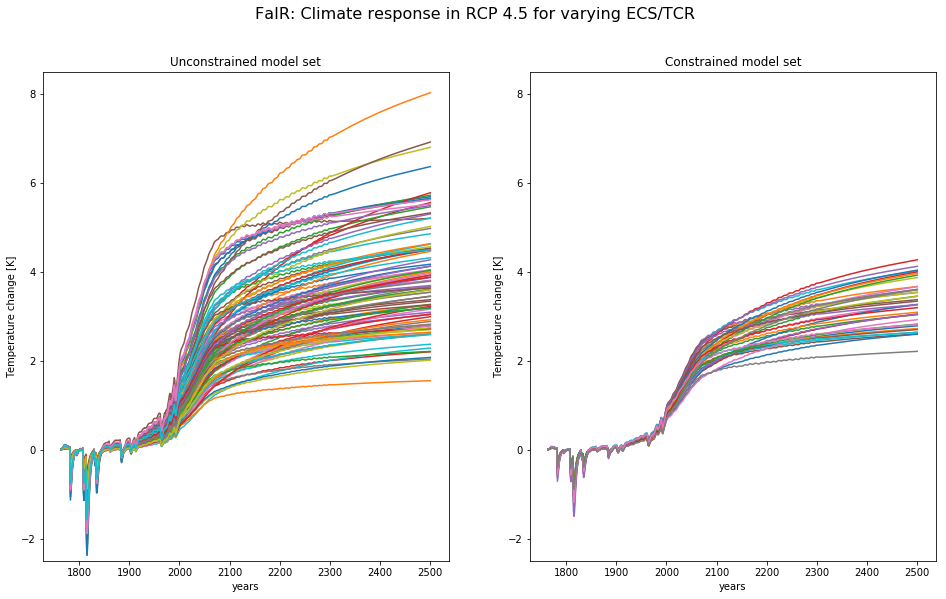

In [70]:
print(np.sum(constrained),'of 100 models remain after constraining them to historical temperature data. \n')

# Plot temperature projections of models
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(rcp45.Emissions.year, T);
ax1.set_title('Unconstrained model set')
ax1.set_xlabel('years')
ax1.set_ylabel('Temperature change [K]')
ax1.set_ylim([-2.5,8.5])

# Plot constrained models
ax2.plot(rcp45.Emissions.year, T[:,constrained]);
ax2.set_title('Constrained model set')
ax2.set_xlabel('years')
ax2.set_ylabel('Temperature change [K]')
ax2.set_ylim([-2.5,8.5])
f.suptitle('FaIR: Climate response in RCP 4.5 for varying ECS/TCR',fontsize=16)
plt.show()

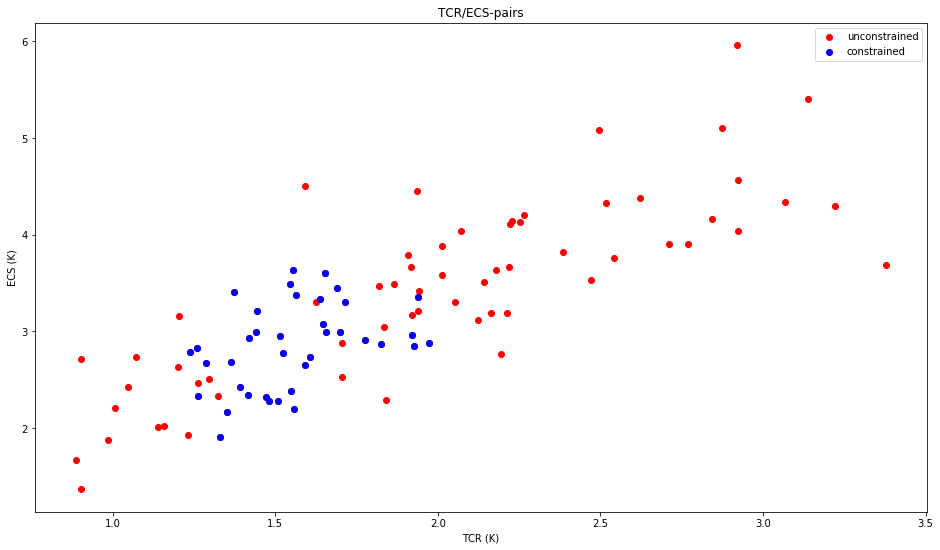

In [17]:
# Plot constrained and unconstrained TCR/ECS pairs calculated with FaIRs function for the correlation of TCR and ECS
plt.scatter(tcrecs[:][:,0], tcrecs[:][:,1], c='red', label='unconstrained')
plt.scatter(tcrecs[constrained][:,0], tcrecs[constrained][:,1], c='blue', label='constrained')
plt.xlabel('TCR (K)')
plt.ylabel('ECS (K)')
plt.title('TCR/ECS-pairs')
plt.legend()
plt.show()

In [67]:
# FaIR: CO2-only run with fossil and landuse CO2 emissions of RCP4.5 to 
#       estimate carbon budget for a global warming target of 1.5°C
# emissions peak at around 2040
CO2emissions = np.sum(rcp45.Emissions.emissions[:,1:2], axis=1)
T_CO2 = np.zeros((nt,100))
for i in range(100):
    _,_,T_CO2[:,i] = fair.forward.fair_scm(emissions=CO2emissions,
                            other_rf=np.zeros(CO2emissions.size),
                            useMultigas = False,
                            r0 = r0[i],
                            rc = rc[i],
                            rt = rt[i],
                            tcrecs = tcrecs[i,:],
                            F2x = F2x[i]
                           )

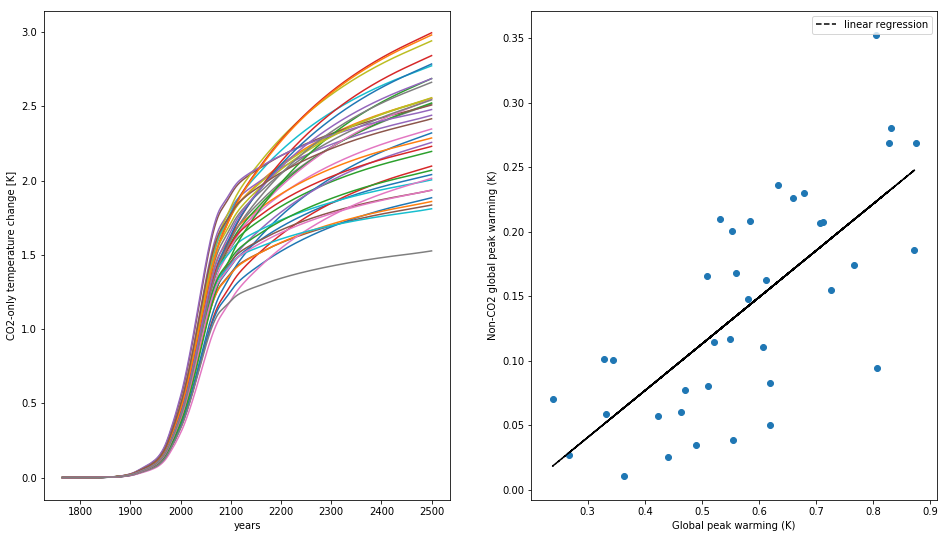

In [106]:
# Compute remaining carbon budget with FaIR
f, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(rcp45.Emissions.year, T_CO2[:,constrained])
ax1.set_xlabel('years')
ax1.set_ylabel('CO2-only temperature change [K]')

Tbase = np.mean(T[241:250,constrained]) # current warming, averaged 2006-2015
TnonCO2 = T-T_CO2 # non-CO2 warming
TnonCO2base = np.mean(TnonCO2[241:250,constrained]) # current warming, averaged 2006-2015
# do linear regression
slope, y0, _, _, _ = stats.linregress(T[275,constrained]-Tbase, TnonCO2[275,constrained]-TnonCO2base)
y = y0 + slope*(T[275,constrained]-Tbase) 
# Reference non-CO2 temperature contribution (RNCTC)
def RNCTC( tempPeak ):
    return y0 + slope*(tempPeak-Tbase)
# Plot
ax2.plot( T[275,constrained]-Tbase, y, linestyle='--', color='black', label='linear regression' )
ax2.scatter( T[275,constrained]-Tbase, TnonCO2[275,constrained]-TnonCO2base )
ax2.set_xlabel( 'Global peak warming (K)' )
ax2.set_ylabel( 'Non-CO2 global peak warming (K)' )
ax2.legend()
plt.show()

In [128]:
# Compute remaining carbon budget with FaIR
# Data from IPCC SR15 [6]:
# TCRE = (0.8-2.5) K/1000 GtC
# already emitted CO2: (1940 +/- 300) GtCO2
Ttarget = 1.5 - Tbase - RNCTC(1.5)# allowed further CO2-related warming for a target of 1.5°C global warming with 
                                  # respect to preindustrial times
convFac = (12/44)/1000 # conversion factor GtCO2 -> 1000 GtC
emittedCarbon = 1940*convFac # in 1000 GtC
TCRE = Tbase/emittedCarbon # transient climate response to cumulative carbon emissions
budget = (Ttarget/TCRE)/convFac # CO2 budget
print('Current warming: \t %.2f °C \n'%(Tbase))
print('Maximum further \n CO2-related warming: \t %.2f °C \n'%Ttarget)
print('Emitted carbon: \t %.2f 1000 GtC \n'%emittedCarbon)
print('TCRE from our data: \t %.2f °C/1000 GtC\n'%TCRE)
print('Remaining budget: \t %.2f GtCO2'%budget)

Current warming: 	 0.98 °C 

Maximum further 
 CO2-related warming: 	 0.40 °C 

Emitted carbon: 	 0.53 1000 GtC 

TCRE from our data: 	 1.86 °C/1000 GtC

Remaining budget: 	 784.87 GtCO2


<a id='section6'></a>
**References**:

[1] Smith, C., Forster, P., Allen, M., Leach, N., J. Millar, R., A. Passerello, G., and Regayre, L. (2018). *Fair v1.3: A simple emissions-based impulse response and carbon cycle model*. Geoscientific Model Development, 11.

[2] M, M., C. B. Raper, S., and M. L. Wigley, T. (2011). *Emulating coupled atmosphere-ocean and carbon cycle models with a simpler model, magicc6 - part 1: Model description and calibration*. Atmospheric Chemistry and Physics, 11.
    
[3] Etminan, M., Myhre, G., Highwood, E., and P. Shine, K. (2016). *Radiative forcing of carbon dioxide, methane, and nitrous oxide: A significant revision of the methane radiative forcing: Greenhouse gas radiative forcing*. Geophysical Research Letters, 43.
    
[4] Hansen, J., Mki. Sato, R. Ruedy, L. Nazarenko, A. Lacis, G.A. Schmidt, G. Russell, I. Aleinov, M. Bauer, SS. Bauer, N. Bell, B. Cairns, V. Canuto, M. Chandler, Y. Cheng, A. Del Genio, G. Faluvegi, E. Fleming, A. Friend, T. Hall, C. Jackman, M. Kelley, N. Kiang, D. Koch, J. Lean, J. Lerner, K. Lo, S. Menon, R. Miller, P. Minnis, T. Novakov, V. Oinas, Ja. Perlwitz, Ju. Perlwitz, D. Rind, A. Romanou, D. Shindell, P. Stone, S. Sun, N. Tausnev, D. Thresher, B. Wielicki, T. Wong, M. Yao, and S. Zhang 2005. *Efficacy of climate forcings*. J. Geophys. Res. 110, D18104, doi:10.1029/2005JD005776.

[5] Forster,  P.,  D.  Huppmann,  E.  Kriegler,  L.  Mundaca,  C.  Smith,  J.  Rogelj,  and  R.  Séférian,  2018:  *Mitigation  Pathways  Compatible  with  1.5°C  in  the  Context  of  Sustainable  Development  Supplementary  Material*.  In:  Global Warming of 1.5°C. An IPCC Special Report on the impacts of global warming of 1.5°C above pre-industrial levels and related global greenhouse gas emission pathways, in the context of strengthening the global response to the threat of climate change, sustainable development, and efforts to eradicate poverty [Masson-Delmotte, V., P. Zhai, H.-O. Pörtner, D. Roberts, J. Skea, P.R. Shukla, A. Pirani, W. Moufouma-Okia, C. Péan, R. Pidcock, S. Connors, J.B.R. Matthews, Y. Chen, X. Zhou, M.I. Gomis, E. Lonnoy, T. Maycock, M. Tignor, and T. Waterfield (eds.)]

[6] Rogelj, J., D. Shindell, K. Jiang, S. Fifita, P. Forster, V. Ginzburg, C. Handa, H. Kheshgi, S. Kobayashi, E. Kriegler, L. Mundaca, R. Séférian, and M.V. Vilariño, 2018: *Mitigation Pathways Compatible with 1.5°C in the Context of Sustainable Development*. In: Global Warming of 1.5°C. An IPCC Special Report on the impacts of global warming of 1.5°C above pre-industrial levels and related global greenhouse gas emission pathways, in the context of strengthening the global response to the threat of climate change, sustainable development, and efforts to eradicate poverty [Masson-Delmotte, V., P. Zhai, H.-O. Pörtner, D. Roberts, J. Skea, P.R. Shukla, A. Pirani, W. Moufouma-Okia, C. Péan, R. Pidcock, S. Connors, J.B.R. Matthews, Y. Chen, X. Zhou, M.I. Gomis, E. Lonnoy, T. Maycock, M. Tignor, and T. Waterfield (eds.)]. In Press.

Used the following software packages:

https://github.com/OMS-NetZero/FAIR (17.05.2019) <br>
https://pypi.org/project/pymagicc/ (17.05.2019)